In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import string as str
import seaborn as sns
import os

In [80]:
df = pd.read_csv('./data/20180510_US_funnel_UTF.csv')

/Users/joehardy/Dev/ML/ML_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (3,4,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [81]:
def make_date_cols(df):
    df['lead_creation_datetime'] = pd.to_datetime(pd.Series(df['Lead Creation Datetime']))
    df['created_date'] = pd.to_datetime(pd.Series(df['Created Date']))
    df['datetime_of_first_call'] = pd.to_datetime(pd.Series(df['DateTime Of First Call']))
    df['converted_date'] = pd.to_datetime(pd.Series(df['Converted Date']))
    return(df)

In [82]:
df = make_date_cols(df)

In [83]:
df.columns

Index(['Lead Creation Datetime', 'Created Date', 'Lead ID', 'Phone', 'Mobile',
       'OM Test ID', 'Landing URL', 'act', 'Usage', 'Controlling Channel',
       'Marketing offer', 'Lead Status', 'Reason for closing of lead',
       'Converted', 'Opportunity ID', 'Converted Date', 'Stage', 'Last quote',
       'Reason for closed and lost', 'Alternative phone', 'Searching for',
       'Experience', 'Salutation', 'Age of current hearing aid',
       'Currently looking for hearing aids', 'Visited ENT or audiologist',
       'Recent hearing test', 'Why not sooner?', 'COSI Basic Subtype 1',
       'Discreet design', 'Tinnitus', 'Purchase timeframe',
       'Professional status', 'Income', 'Willingness to invest',
       'Is U.S. Veteran', 'Exposed to loud noises', 'Precise Age',
       'Zip/Postal Code', 'DateTime Of First Call', 'lead_creation_datetime',
       'created_date', 'datetime_of_first_call', 'converted_date'],
      dtype='object')

In [84]:
df[:10]

,Lead Creation Datetime,Created Date,Lead ID,Phone,Mobile,OM Test ID,Landing URL,act,Usage,Controlling Channel,...,Willingness to invest,Is U.S. Veteran,Exposed to loud noises,Precise Age,Zip/Postal Code,DateTime Of First Call,lead_creation_datetime,created_date,datetime_of_first_call,converted_date
0,3/10/18 0:04,3/10/18,00Q1o00000KCYxl,NaN,1.7129e+10,NaN,https://www.hear.com/hearing-aids/innovations-...,ACT0000001277ACT,google,SEO,...,NaN,No,NaN,62,57049,3/10/18 9:30,2018-03-10 00:04:00,2018-03-10,2018-03-10 09:30:00,NaT
1,3/10/18 0:23,3/10/18,00Q1o00000KCYyt,13013363968,NaN,13001,https://www.hearing-experts-at-hear.com/hearin...,ACT0000011563ACT,email_amx_product-invisible_sta_005_.,Email,...,No,No,NaN,84,20743,NaN,2018-03-10 00:23:00,2018-03-10,NaT,NaT
2,3/10/18 0:31,3/10/18,00Q1o00000KCYzc,NaN,1.60292e+10,3618,https://m.hear.com/product-primax/dyn/?act=act...,ACT0000007592ACT,display_powerinbox_product-primax_all_aqu_all,Display,...,Yes financing,No,NaN,74,85053,3/10/18 11:26,2018-03-10 00:31:00,2018-03-10,2018-03-10 11:26:00,NaT
3,3/10/18 0:35,3/10/18,00Q1o00000KCYzm,NaN,1.51721e+10,3618,https://m.hear.com/product-primax/dyn/?act=act...,ACT0000007592ACT,display_powerinbox_product-primax_all_aqu_all,Display,...,NaN,Yes,No,74,78418,3/10/18 9:30,2018-03-10 00:35:00,2018-03-10,2018-03-10 09:30:00,NaT
4,3/10/18 0:42,3/10/18,00Q1o00000KCZ06,15306383622,NaN,3100,https://m.hear.com/hearing-aids-consultation/r...,ACT0000010752ACT,email_intmail_generic_cpgn-plain-optimization-...,CRM,...,Yes,No,NaN,66,96094,3/10/18 11:23,2018-03-10 00:42:00,2018-03-10,2018-03-10 11:23:00,NaT
5,3/10/18 0:43,3/10/18,00Q1o00000KCZ0G,NaN,1.22942e+10,3618,https://m.hear.com/product-primax-david/dyn/or...,ACT0000011057ACT,social_facebook_product-primax-hassel_mob_nani...,Social,...,No,Yes,Yes,66,39819,NaN,2018-03-10 00:43:00,2018-03-10,NaT,NaT
6,3/10/18 0:51,3/10/18,00Q1o00000KCZ19,NaN,1.21476e+10,NaN,https://www.hear.com/,ACT0000001139ACT,hear.com US,Direct,...,No,No,NaN,64,75248,NaN,2018-03-10 00:51:00,2018-03-10,NaT,NaT
7,3/10/18 0:59,3/10/18,00Q1o00000KCZ1x,NaN,1.61964e+10,3618,https://m.hear.com/product-primax/dyn/?aud_c=t...,ACT0000008465ACT,display_criteo_product-primax_all_aqu_,Display,...,Yes financing,No,NaN,54,92301,NaN,2018-03-10 00:59:00,2018-03-10,NaT,NaT
8,3/10/18 1:01,3/10/18,00Q1o00000KCZ27,13347930971,NaN,3620,https://m.hear.com/product-primax/dyn/?aud_c=t...,ACT0000009805ACT,gdn_gdn_product-primax_all-gender_age-55+_audi...,GDN,...,No,No,NaN,73,36117,NaN,2018-03-10 01:01:00,2018-03-10,NaT,NaT
9,3/10/18 2:17,3/10/18,00Q1o00000KCZES,NaN,1.54181e+10,NaN,http://m.hear.com/product-primax/tb27xi/1/?act...,ACT0000008465ACT,display_criteo_product-primax_all_aqu_,Display,...,NaN,No,NaN,81,97824,3/10/18 11:23,2018-03-10 02:17:00,2018-03-10,2018-03-10 11:23:00,NaT


In [85]:
df['precise_age'] = pd.to_numeric(df['Precise Age'], errors='coerce')

In [86]:
df_age = df[(df.precise_age > 18) & (df.precise_age < 95)]

/Users/joehardy/Dev/ML/ML_env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


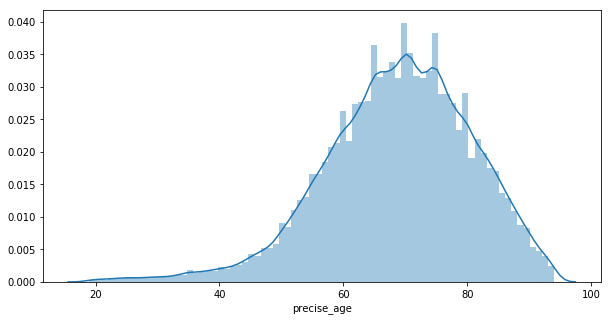

In [87]:
f, ax = plt.subplots(figsize=(10, 5))
sns.distplot(df_age.precise_age, bins = 76)

In [88]:
df_age.precise_age.mean()

68.85666114649682

In [89]:
df.describe()

,Converted,precise_age
count,129892.000000,1.271120e+05
mean,0.070512,7.867078e+42
std,0.256010,2.804831e+45
min,0.000000,-9.000000e+01
25%,0.000000,6.200000e+01
50%,0.000000,7.000000e+01
75%,0.000000,7.700000e+01
max,1.000000,1.000000e+48


In [75]:
df.Converted.describe()

count    39501.000000
mean         0.068479
std          0.252570
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Converted, dtype: float64

In [91]:
df['Reason for closing of lead'].describe()

count               106493
unique                  24
top       Low quality lead
freq                 44234
Name: Reason for closing of lead, dtype: object

In [93]:
df['Reason for closing of lead'].unique()

array(['Several times not reached', 'Low quality lead',
       'No clear buying interest yet', 'No time for fitting process', nan,
       'Not able / willing to afford devices', 'Wrong / No phone number',
       'Unintended registration', 'Customer at competitor',
       'Recently bought hearing aids', 'No telephone conversation',
       'Customer at partner', 'Distance to partner', 'Duplicate',
       'Not convinced by concept', 'Foreign country',
       'Customer does not want to share credit card information',
       'Competition offers better price', 'Duplicate: Opportunity',
       'Duplicate: Lead',
       'Prejudices against hearing aids (performance, size, image)',
       'Benefit not supported',
       'Communication issues (foreign language, hearing loss)',
       'Unsupported product/service (e.g. implant, home service)',
       'Customer passed away'], dtype=object)

In [95]:
df['Lead Status'].unique()

array(['Closed (triggered)', 'Closed (automatically)', 'Closed',
       'Qualified', 'Call back scheduled',
       'Follow-up to complete customer consultation', 'Open',
       'Not reached', 'Consultation'], dtype=object)

In [97]:
df[df['Lead Status']=='Closed (automatically)'][:10]['Reason for closing of lead']

1     Low quality lead
5     Low quality lead
6     Low quality lead
7     Low quality lead
8     Low quality lead
11    Low quality lead
14    Low quality lead
20    Low quality lead
23    Low quality lead
24    Low quality lead
Name: Reason for closing of lead, dtype: object